### baseline

In [218]:
# 필요한 라이브러리 로드
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# 데이터 로드
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')

# 결측치 처리 (배터리 용량: 평균 대체)
train['배터리용량'].fillna(train['배터리용량'].mean(), inplace=True)
test['배터리용량'].fillna(test['배터리용량'].mean(), inplace=True)

# 사고이력과 차량상태를 더미 변수로 변환
train = pd.get_dummies(train, columns=['모델', '구동방식', '사고이력', '차량상태'], drop_first=True)
test = pd.get_dummies(test, columns=['모델', '구동방식', '사고이력', '차량상태'], drop_first=True)

# 타깃 변수와 특성 분리
X = train.drop(columns=['ID', '제조사', '가격(백만원)'])
y = train['가격(백만원)']
test_data = test.drop(columns=['ID', '제조사'])

print("특성 개수", len(X.columns))

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM 데이터셋 생성
lgb_train = lgb.Dataset(X_train, y_train)
lgb_valid = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

# LightGBM 파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'random_state': 42
}

# 모델 학습
model = lgb.train(params, lgb_train, valid_sets=[lgb_train, lgb_valid], num_boost_round=1000)

# 검증 데이터 예측
y_pred = model.predict(X_valid, num_iteration=model.best_iteration)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
print("Validation RMSE:", rmse)

# 테스트 데이터 예측
test_pred = model.predict(test_data, num_iteration=model.best_iteration)

# 제출 파일 생성
submission['가격(백만원)'] = test_pred
submission.to_csv('submission.csv', index=False)
print("제출 파일이 'submission.csv'로 저장되었습니다.")

Train 데이터 형상: (7497, 11)
Test 데이터 형상: (846, 10)
Train 결측치:
ID             0
제조사            0
모델             0
차량상태           0
배터리용량       2711
구동방식           0
주행거리(km)       0
보증기간(년)        0
사고이력           0
연식(년)          0
가격(백만원)        0
dtype: int64
Test 결측치:
ID            0
제조사           0
모델            0
차량상태          0
배터리용량       304
구동방식          0
주행거리(km)      0
보증기간(년)       0
사고이력          0
연식(년)         0
dtype: int64
특성 개수 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 418
[LightGBM] [Info] Number of data points in the train set: 5997, number of used features: 29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from 

C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\3104353146.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['배터리용량'].fillna(train['배터리용량'].mean(), inplace=True)
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\3104353146.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

Validation RMSE: 1.5954866604053688
제출 파일이 'submission.csv'로 저장되었습니다.


C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


- public : 1.08642 기록

배터리용량 결측치 처리 : 평균 대치

범주형 변수 처리 : 원핫 인코딩

모델링 : LightGBM

## 전기차 가격 예측

### 1. 데이터 확인

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [15]:
# 데이터 로드
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
submission_df = pd.read_csv('data/sample_submission.csv')

In [16]:
from ydata_profiling import ProfileReport

pr = ProfileReport(train_df)
pr.to_file("./report.html")

Summarize dataset:  41%|████      | 14/34 [00:00<00:00, 21.01it/s, scatter 배터리용량, 배터리용량]         C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 48176 (\N{HANGUL SYLLABLE BAE}) missing from font(s) Arial.
  plt.savefig(
C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from font(s) Arial.
  plt.savefig(
C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Arial.
  plt.savefig(
C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) Arial.
  plt.savefig(
C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\ydata_profiling\visualisation\utils.py:73: UserWarning: Glyph 47049 (\N{HANGUL S

In [17]:
train.shape, test.shape

NameError: name 'train' is not defined

### 1. 결측치 대체
- 배터리용량에서 결측치 발생
- 다른 변수와의 상관성을 기반으로 그룹 설정
-   차량상태: 0.768, 주행거리: -0.661, 모델: 0.466

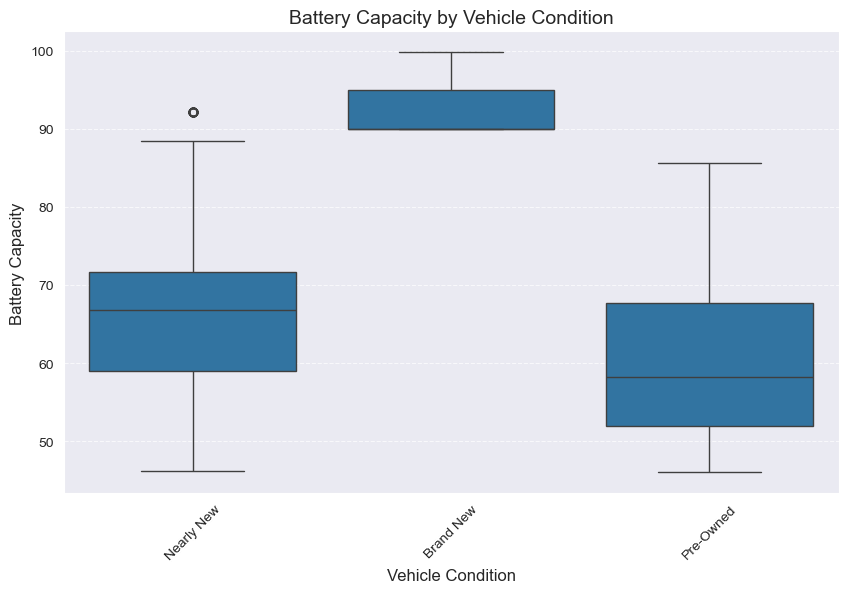

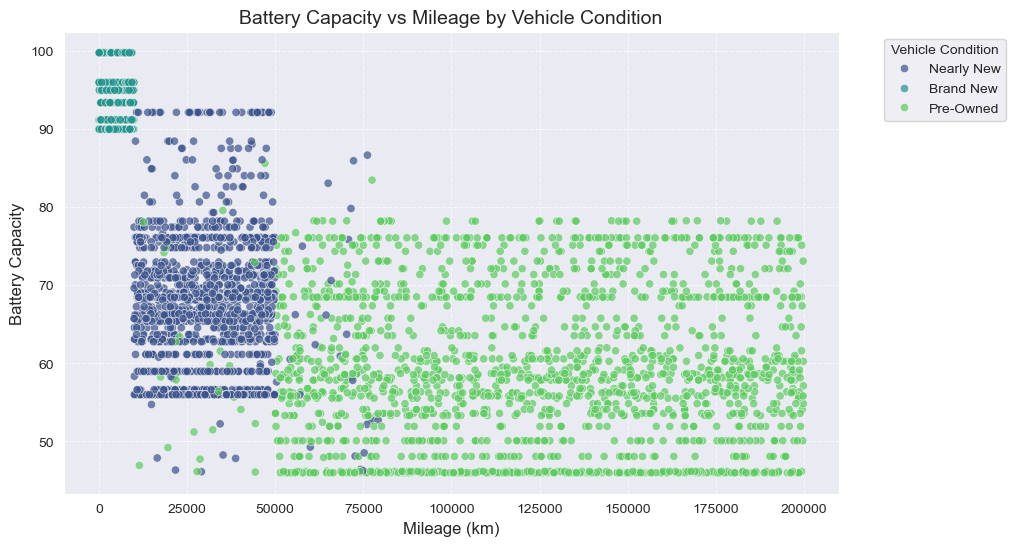

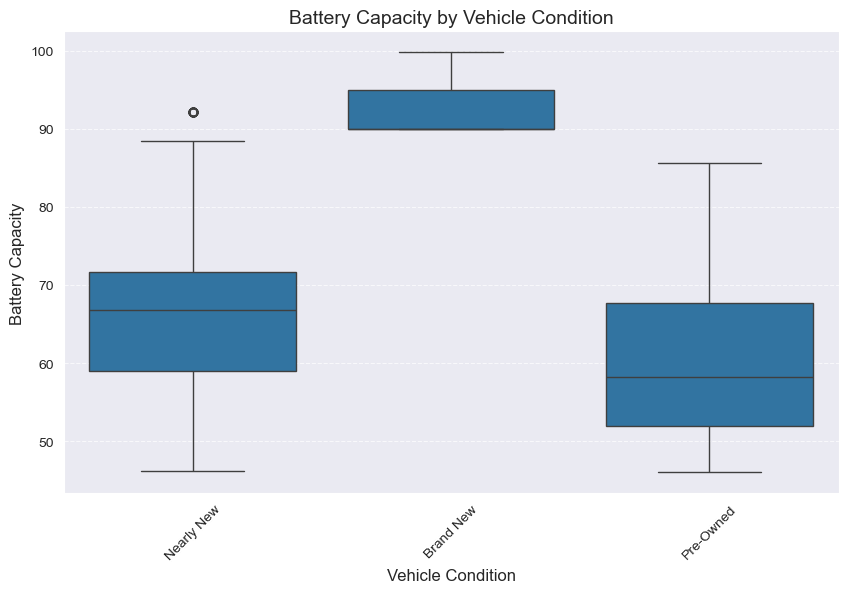

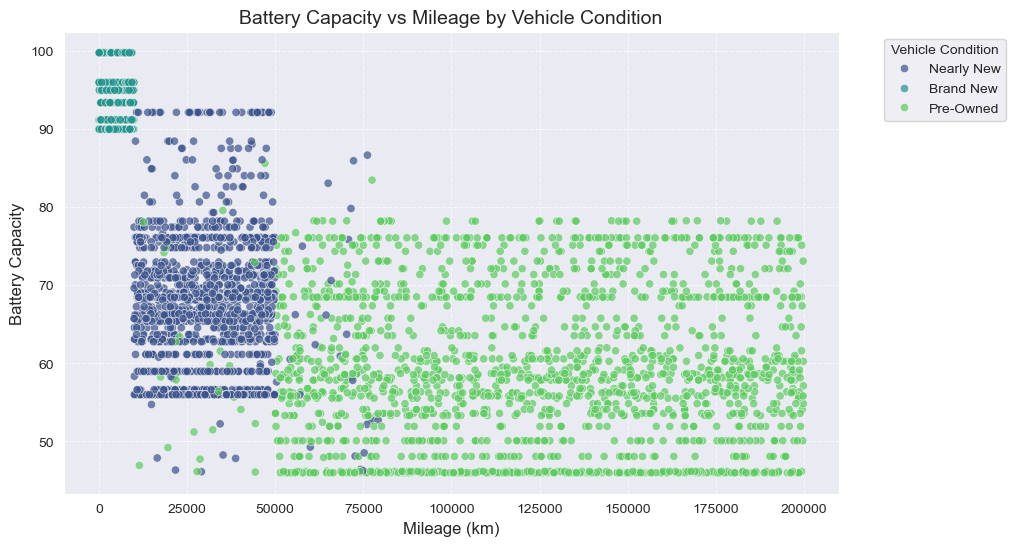

In [21]:
%matplotlib inline

# Re-importing necessary libraries due to session reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 차량상태별 배터리용량 분포
plt.figure(figsize=(10, 6))
sns.boxplot(x='차량상태', y='배터리용량', data=train_df)
plt.title('Battery Capacity by Vehicle Condition', fontsize=14)
plt.xlabel('Vehicle Condition', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('battery_capacity_by_condition.png')  # 이미지 저장
plt.show()

# 주행거리 대비 배터리용량의 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주행거리(km)', y='배터리용량', hue='차량상태', data=train_df, palette='viridis', alpha=0.7)
plt.title('Battery Capacity vs Mileage by Vehicle Condition', fontsize=14)
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Vehicle Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('battery_capacity_vs_mileage.png')  # 이미지 저장
plt.show()



<Figure size 1400x800 with 0 Axes>

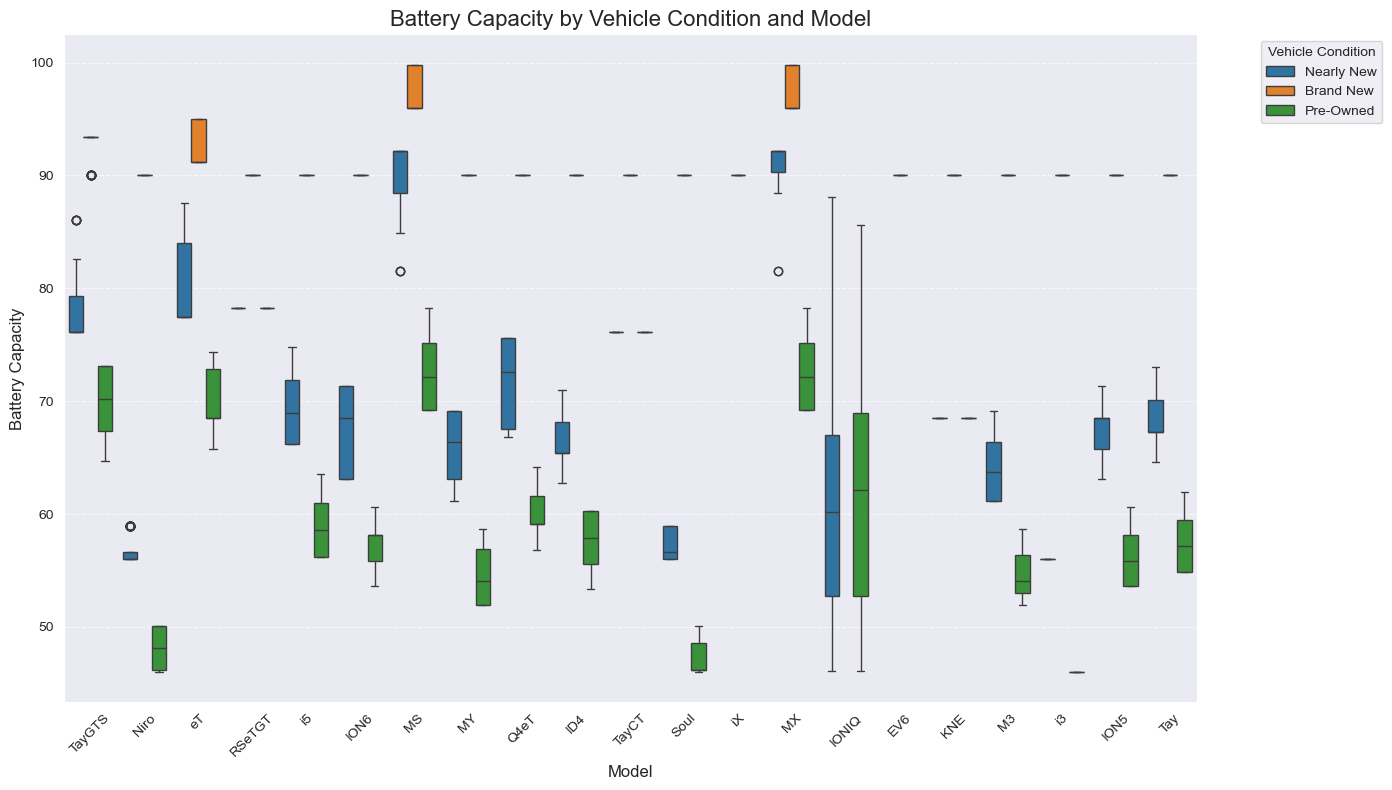

In [23]:
# 차량 상태와 모델에 따른 배터리용량 분포 시각화
plt.figure(figsize=(14, 8))
sns.boxplot(x='모델', y='배터리용량', hue='차량상태', data=train_df)
plt.title('Battery Capacity by Vehicle Condition and Model', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Vehicle Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('battery_capacity_by_condition_and_model.png')  # 이미지 저장
plt.show()


140
ID           0
제조사          0
모델           0
차량상태         0
배터리용량       32
구동방식         0
주행거리(km)     0
보증기간(년)      0
사고이력         0
연식(년)        0
가격(백만원)      0
dtype: int64


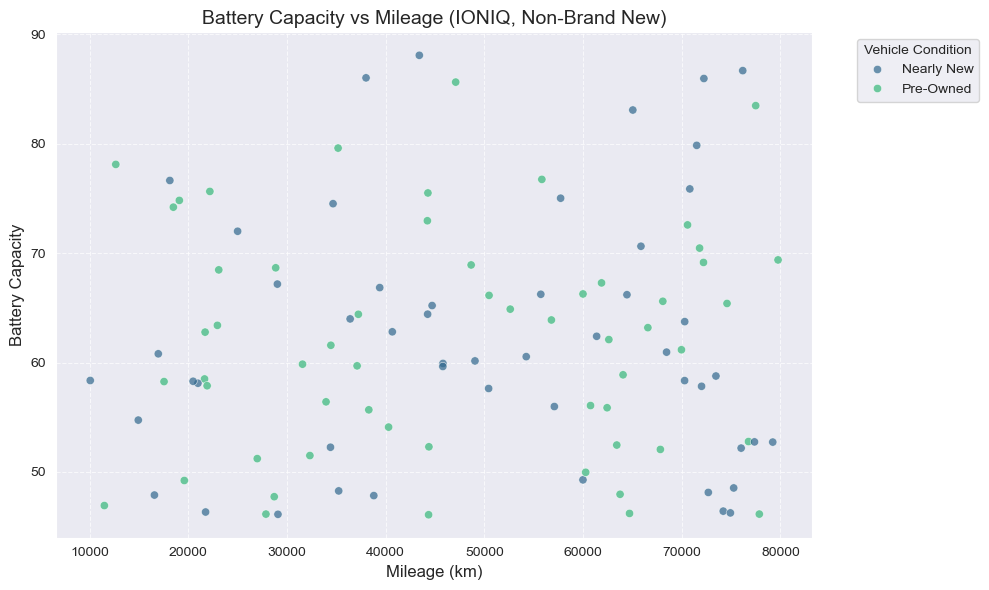

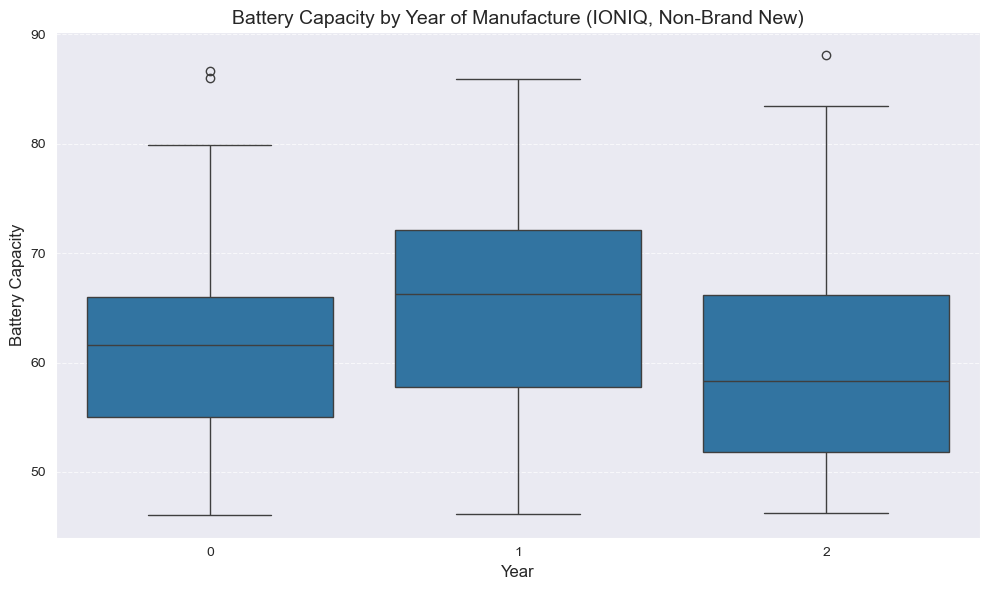

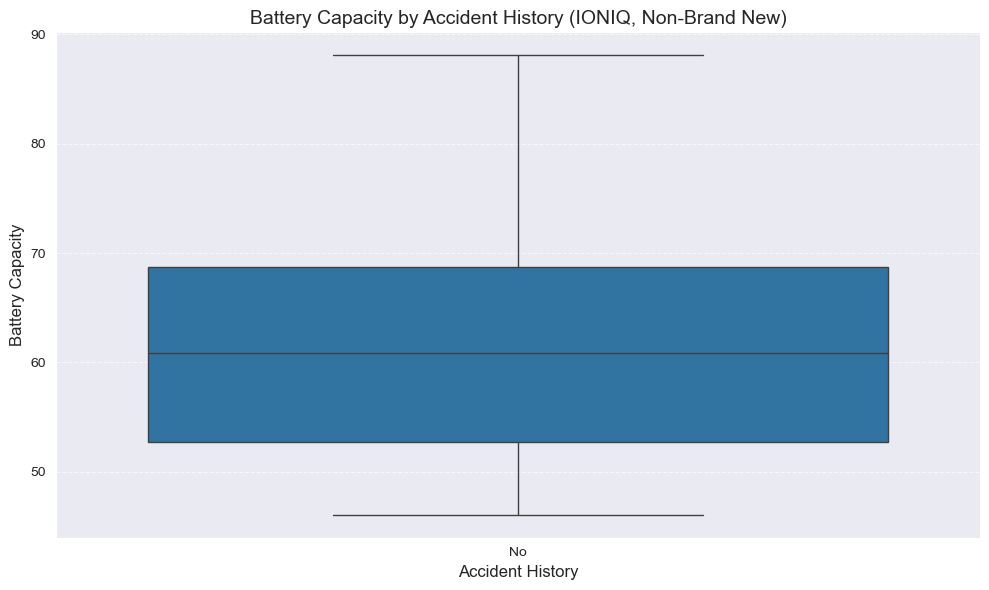

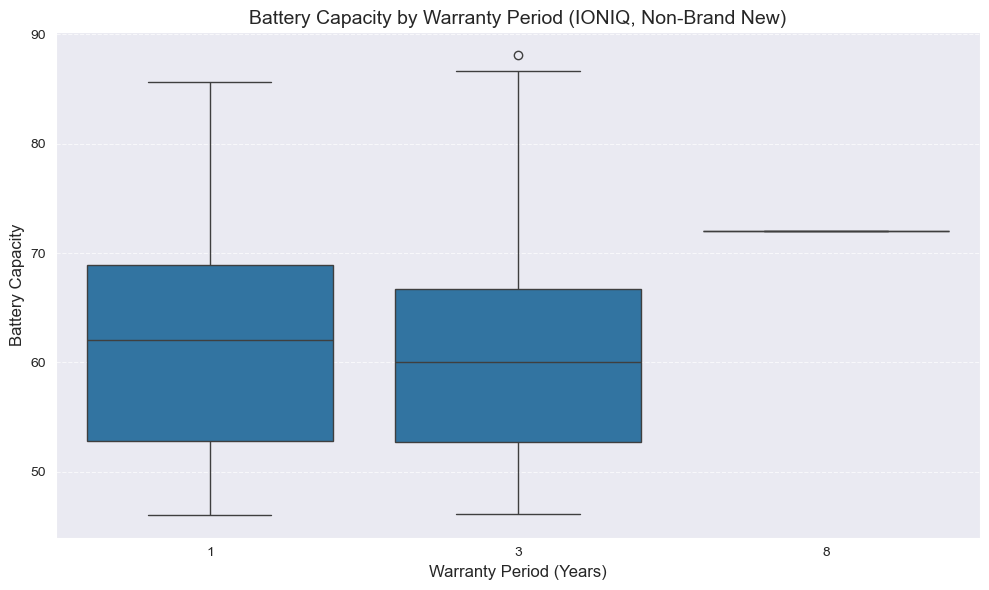

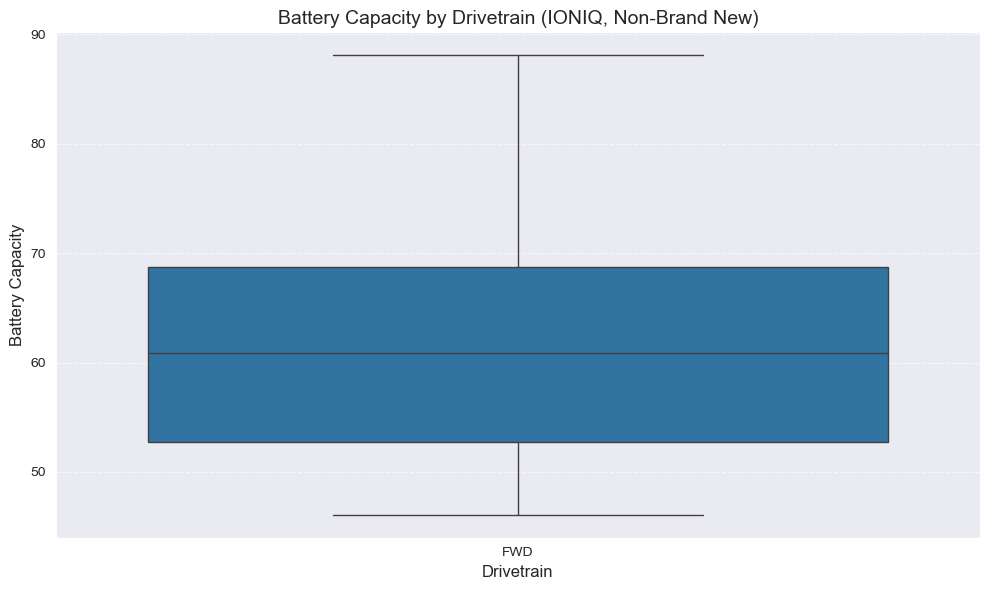

In [31]:
# 데이터 필터링: Brand New가 아니며 모델이 IONIQ인 데이터만 선택
filtered_data = train_df[(train_df['차량상태'] != 'Brand New') & (train_df['모델'] == 'IONIQ')]
print(len(filtered_data))
print(filtered_data.isnull().sum())

# 주행거리와 배터리 용량 관계
plt.figure(figsize=(10, 6))
sns.scatterplot(x='주행거리(km)', y='배터리용량', hue='차량상태', data=filtered_data, palette='viridis', alpha=0.7)
plt.title('Battery Capacity vs Mileage (IONIQ, Non-Brand New)', fontsize=14)
plt.xlabel('Mileage (km)', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.legend(title='Vehicle Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 연식과 배터리 용량 관계
plt.figure(figsize=(10, 6))
sns.boxplot(x='연식(년)', y='배터리용량', data=filtered_data)
plt.title('Battery Capacity by Year of Manufacture (IONIQ, Non-Brand New)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 사고이력과 배터리 용량 관계
plt.figure(figsize=(10, 6))
sns.boxplot(x='사고이력', y='배터리용량', data=filtered_data)
plt.title('Battery Capacity by Accident History (IONIQ, Non-Brand New)', fontsize=14)
plt.xlabel('Accident History', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 보증기간과 배터리 용량 관계
plt.figure(figsize=(10, 6))
sns.boxplot(x='보증기간(년)', y='배터리용량', data=filtered_data)
plt.title('Battery Capacity by Warranty Period (IONIQ, Non-Brand New)', fontsize=14)
plt.xlabel('Warranty Period (Years)', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='구동방식', y='배터리용량', data=filtered_data)
plt.title('Battery Capacity by Drivetrain (IONIQ, Non-Brand New)', fontsize=14)
plt.xlabel('Drivetrain', fontsize=12)
plt.ylabel('Battery Capacity', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [33]:
# 배터리용량 결측치 대체 함수 정의
def fill_battery_capacity(df):
    # 결측치 행만 처리
    missing_indices = df[df['배터리용량'].isnull()].index

    # 차량상태가 Brand New인 경우
    brand_new_avg = df[df['차량상태'] == 'Brand New']['배터리용량'].mean()

    for idx in missing_indices:
        row = df.loc[idx]

        if row['차량상태'] == 'Brand New':
            # 1. Brand New: 차량 상태 평균으로 대체
            df.loc[idx, '배터리용량'] = brand_new_avg
        elif row['모델'] == 'IONIQ':
            # 3. 모델이 IONIQ: 같은 차량 상태 + 보증기간 평균으로 대체
            same_condition_warranty = df[(df['차량상태'] == row['차량상태']) & 
                                         (df['보증기간(년)'] == row['보증기간(년)'])]['배터리용량']
            if not same_condition_warranty.empty:
                df.loc[idx, '배터리용량'] = same_condition_warranty.mean()
        else:
            # 2. 그 외: 같은 차량 상태 + 모델 평균으로 대체
            same_condition_model = df[(df['차량상태'] == row['차량상태']) & 
                                       (df['모델'] == row['모델'])]['배터리용량']
            if not same_condition_model.empty:
                df.loc[idx, '배터리용량'] = same_condition_model.mean()

    return df

# 결측치 처리
train_df = fill_battery_capacity(train_df)
test_df = fill_battery_capacity(test_df)

# 결측치가 모두 처리되었는지 확인
print(f"Train 결측치: {train_df['배터리용량'].isnull().sum()}")
print(f"Test 결측치: {test_df['배터리용량'].isnull().sum()}")


Train 결측치: 0
Test 결측치: 0


In [451]:
# Calculate quantiles for 주행거리(km)
quantiles = train_df['주행거리(km)'].quantile([0, 0.2, 0.5, 0.8, 1.0]).to_dict()

# Define bin edges and labels based on quantiles
bin_edges = [
    quantiles[0.0],  # Minimum
    quantiles[0.2], 
    quantiles[0.5],  # Median
    quantiles[0.8],
    quantiles[1.0]   # Maximum
]
bin_labels = ['Very Low', 'Low', 'High', 'Very High']

# Apply binning
train_df['주행거리_bin'] = pd.cut(train_df['주행거리(km)'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display quantiles and the value counts of each bin
quantiles, train_df['주행거리_bin'].value_counts()


({0.0: 3.0,
  0.05: 1043.8,
  0.25: 5465.0,
  0.5: 17331.0,
  0.75: 61252.0,
  0.95: 174270.19999999998,
  1.0: 199827.0},
 주행거리_bin
 Medium-Low     1874
 Medium-High    1874
 Low            1500
 High           1499
 Very Low        375
 Very High       375
 Name: count, dtype: int64)

In [452]:
# Group by 차량상태 and 주행거리_bin to calculate the median of 배터리용량
grouped_median = (
    train_df.groupby(['차량상태', '주행거리_bin'])['배터리용량']
    .median()
    .reset_index()
    .rename(columns={'배터리용량': '대치값'})
)

# Merge the grouped median back into the train dataframe
train_df = train_df.merge(grouped_median, on=['차량상태', '주행거리_bin'], how='left')

# Fill missing values in 배터리용량 using the 대치값
train_df['배터리용량'] = train_df['배터리용량'].fillna(train_df['대치값'])

# Drop the 대치값 column as it's no longer needed
train_df.drop(columns=['대치값'], inplace=True)

# Verify if there are any remaining missing values in 배터리용량
train_df['배터리용량'].isnull().sum()

C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\363075125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df.groupby(['차량상태', '주행거리_bin'])['배터리용량']


0

In [453]:
# Calculate quantiles for 주행거리(km)
quantiles = test_df['주행거리(km)'].quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1.0]).to_dict()

# Define bin edges and labels based on quantiles
bin_edges = [
    quantiles[0.0],  # Minimum
    quantiles[0.05], # 5th percentile
    quantiles[0.25], # Q1
    quantiles[0.5],  # Median
    quantiles[0.75], # Q3
    quantiles[0.95], # 95th percentile
    quantiles[1.0]   # Maximum
]
bin_labels = ['Very Low', 'Low', 'Medium-Low', 'Medium-High', 'High', 'Very High']

# Apply binning
test_df['주행거리_bin'] = pd.cut(test_df['주행거리(km)'], bins=bin_edges, labels=bin_labels, include_lowest=True)

# Display quantiles and the value counts of each bin
quantiles, test_df['주행거리_bin'].value_counts()

# Group by 차량상태 and 주행거리_bin to calculate the median of 배터리용량
grouped_median = (
    test_df.groupby(['차량상태', '주행거리_bin'])['배터리용량']
    .median()
    .reset_index()
    .rename(columns={'배터리용량': '대치값'})
)

# Merge the grouped median back into the train dataframe
test_df = test_df.merge(grouped_median, on=['차량상태', '주행거리_bin'], how='left')

# Fill missing values in 배터리용량 using the 대치값
test_df['배터리용량'] = test_df['배터리용량'].fillna(test_df['대치값'])

# Drop the 대치값 column as it's no longer needed
test_df.drop(columns=['대치값'], inplace=True)

# Verify if there are any remaining missing values in 배터리용량
test_df['배터리용량'].isnull().sum()

C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\416902059.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  test_df.groupby(['차량상태', '주행거리_bin'])['배터리용량']


1

In [454]:
# Calculate the median of 배터리용량 grouped by 차량상태
state_median = (
    train_df.groupby('차량상태')['배터리용량']
    .median()
    .reset_index()
    .rename(columns={'배터리용량': '차량상태_대치값'})
)

# Merge the state-based median into the test dataframe
test_df = test_df.merge(state_median, on='차량상태', how='left')

# Fill the remaining missing value in 배터리용량 using 차량상태_대치값
test_df['배터리용량'] = test_df['배터리용량'].fillna(test_df['차량상태_대치값'])

# Drop the 차량상태_대치값 column as it's no longer needed
test_df.drop(columns=['차량상태_대치값'], inplace=True)

# Verify if there are any remaining missing values in 배터리용량
test_df['배터리용량'].isnull().sum()


0

In [455]:
print(train_df['배터리용량'].isnull().sum())
print(test_df['배터리용량'].isnull().sum())

0
0


### 2. 범주형 변수 처리

- 제조사 : 원핫 인코딩
- 모델 : 클래스가 많아 
- 차량상태 : 클래스 간 순서가 고려되므로 라벨 인코딩
- 구동방식 : 순서가 없으므로 원핫 인코딩
- 사고이력 : 두 개 클래스이므로 binary 인코딩

In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     7497 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


C:\Users\kms10\AppData\Local\Temp\ipykernel_55204\4164169017.py:30: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\kms10\anaconda3\envs\py3_12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


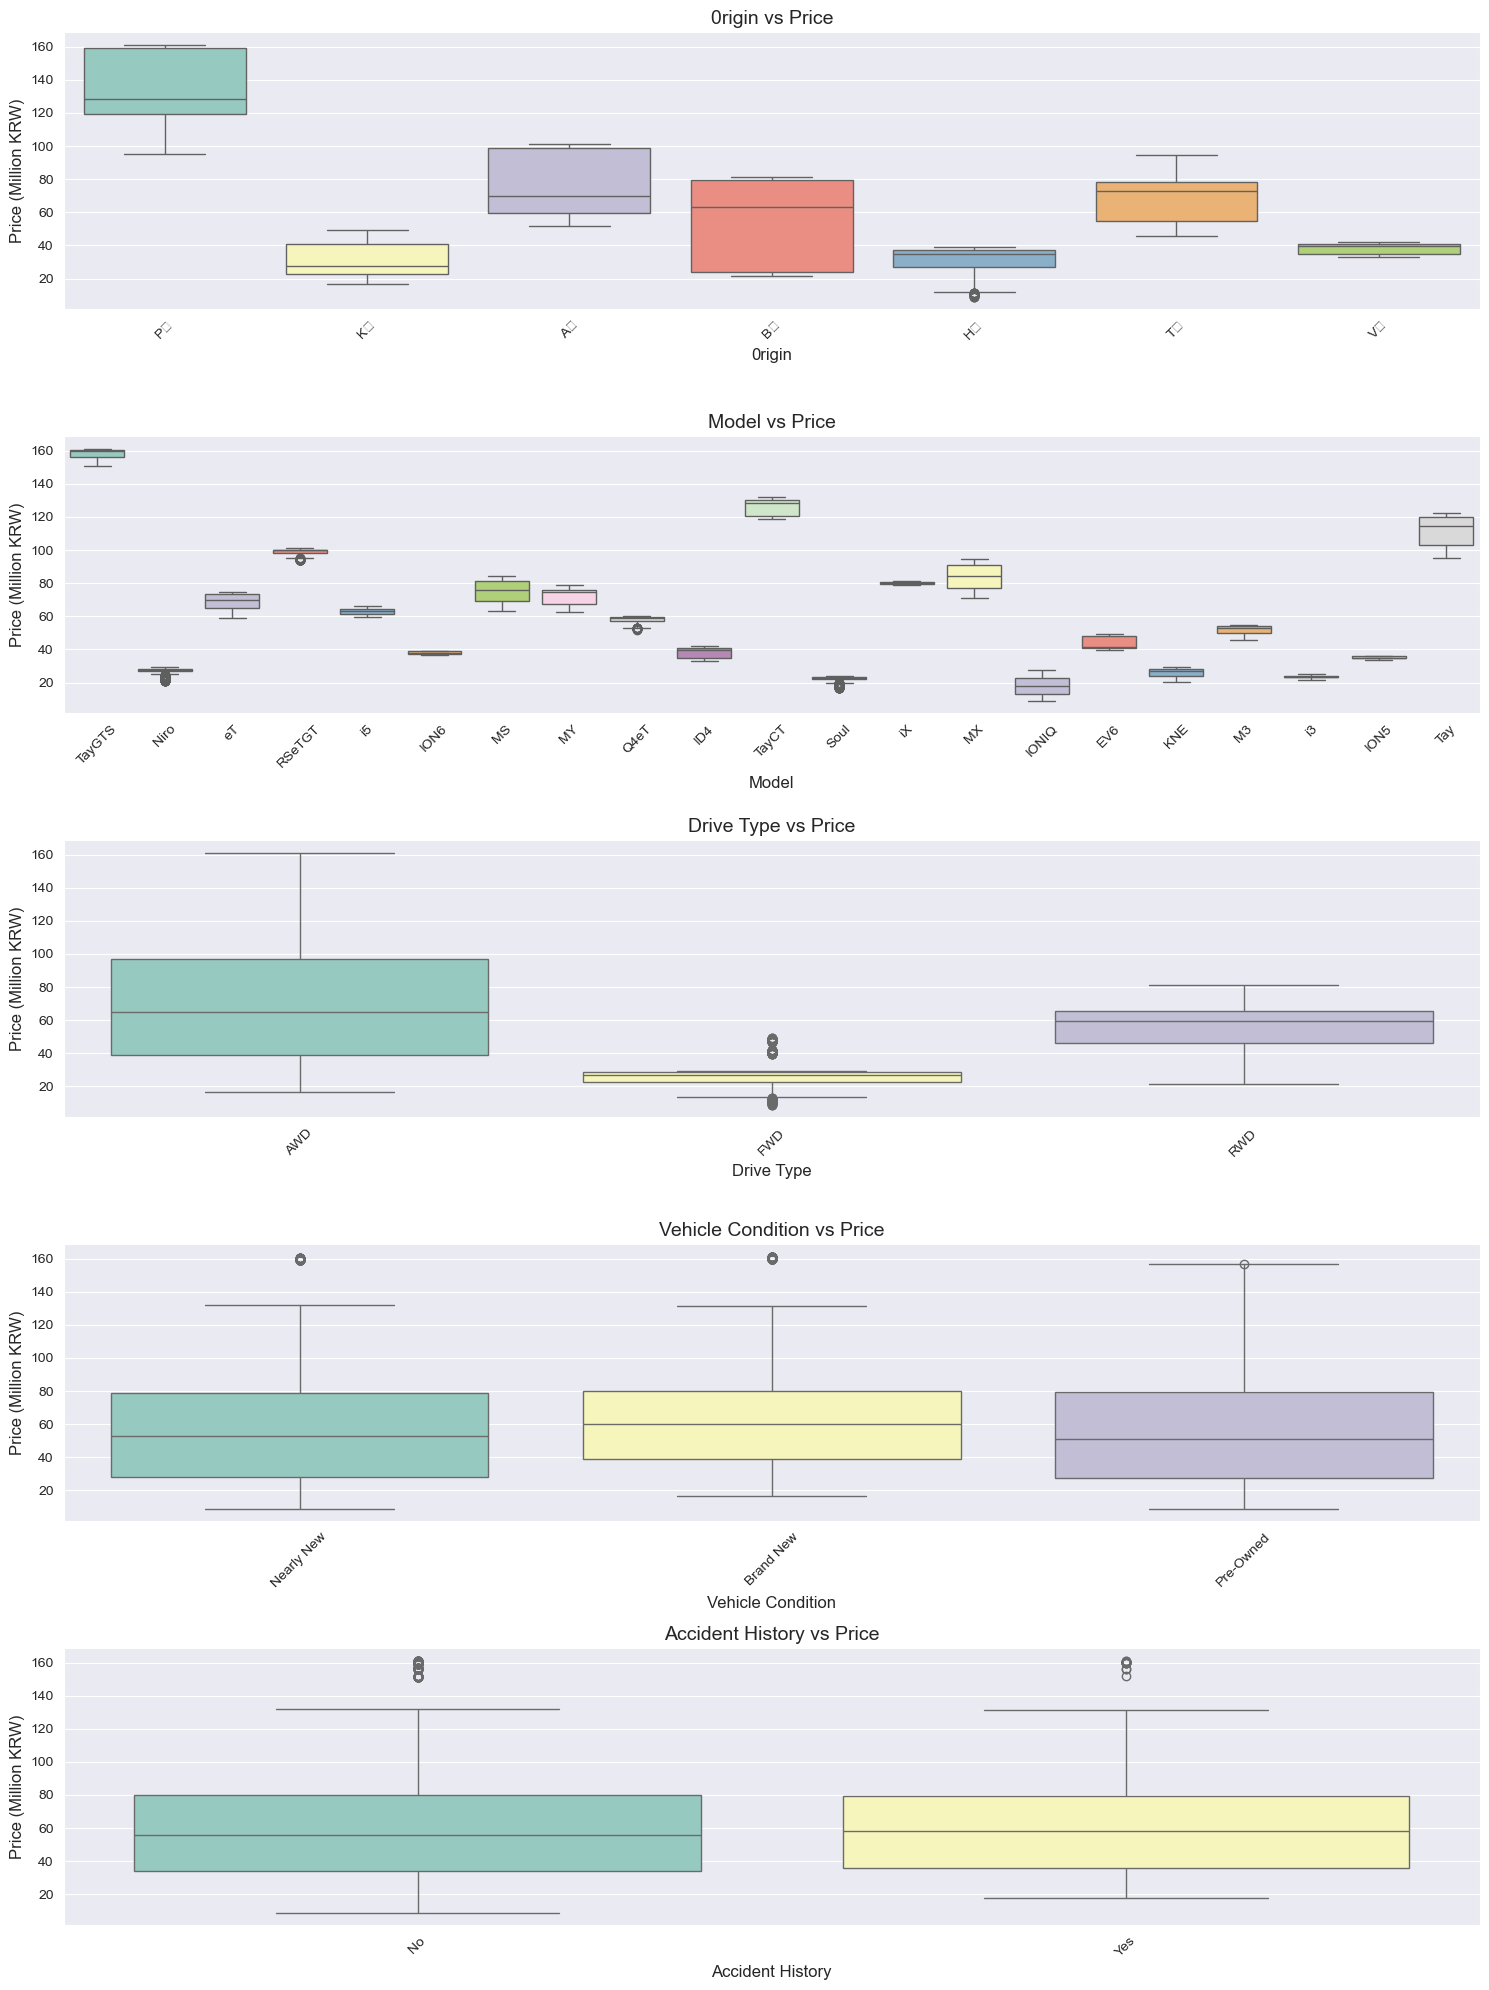

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 변수명을 영어로 매핑
column_mapping = {
    '가격(백만원)': 'Price (Million KRW)',
    '제조사': '0rigin',
    '모델': 'Model',
    '구동방식': 'Drive Type',
    '차량상태': 'Vehicle Condition',
    '사고이력': 'Accident History',
}

# 열 이름 영어로 변환
train_renamed = train_df.rename(columns=column_mapping)

# 범주형 변수 선택
categorical_cols = ['0rigin', 'Model', 'Drive Type', 'Vehicle Condition', 'Accident History']

# 각 범주형 변수에 대해 Boxplot 시각화
plt.figure(figsize=(15, 20))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.boxplot(data=train_renamed, x=col, y='Price (Million KRW)', hue=col, palette='Set3', legend=False)
    plt.title(f'{col} vs Price', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Price (Million KRW)', fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [458]:
from sklearn.preprocessing import LabelEncoder

# One-Hot Encoding for '제조사'
train_df = pd.get_dummies(train_df, columns=['제조사'], prefix='제조사')
test_df = pd.get_dummies(test_df, columns=['제조사'], prefix='제조사')

# One-Hot Encoding for '모델'
train_df = pd.get_dummies(train_df, columns=['모델'], prefix='모델')
test_df = pd.get_dummies(test_df, columns=['모델'], prefix='모델')

# Label Encoding for '차량상태'
label_encoder = LabelEncoder()
train_df['차량상태_encoded'] = label_encoder.fit_transform(train_df['차량상태'])
test_df['차량상태_encoded'] = label_encoder.transform(test_df['차량상태'])

# One-Hot Encoding for '구동방식'
train_df = pd.get_dummies(train_df, columns=['구동방식'], prefix='구동방식')
test_df = pd.get_dummies(test_df, columns=['구동방식'], prefix='구동방식')

# Binary Encoding for '사고이력'
train_df['사고이력_encoded'] = train_df['사고이력'].map({'Yes': 1, 'No': 0})
test_df['사고이력_encoded'] = test_df['사고이력'].map({'Yes': 1, 'No': 0})

# Drop original columns that have been encoded
train_df.drop(columns=['차량상태', '사고이력'], inplace=True)
test_df.drop(columns=['차량상태', '사고이력'], inplace=True)

In [459]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   ID            7497 non-null   object  
 1   배터리용량         7497 non-null   float64 
 2   주행거리(km)      7497 non-null   int64   
 3   보증기간(년)       7497 non-null   int64   
 4   연식(년)         7497 non-null   int64   
 5   가격(백만원)       7497 non-null   float64 
 6   주행거리_bin      7497 non-null   category
 7   제조사_A사        7497 non-null   bool    
 8   제조사_B사        7497 non-null   bool    
 9   제조사_H사        7497 non-null   bool    
 10  제조사_K사        7497 non-null   bool    
 11  제조사_P사        7497 non-null   bool    
 12  제조사_T사        7497 non-null   bool    
 13  제조사_V사        7497 non-null   bool    
 14  모델_EV6        7497 non-null   bool    
 15  모델_ID4        7497 non-null   bool    
 16  모델_ION5       7497 non-null   bool    
 17  모델_ION6       7497 non-null   bool    
 18  모델_IONIQ

### 3. 수치형 변수 처리

- 표준화

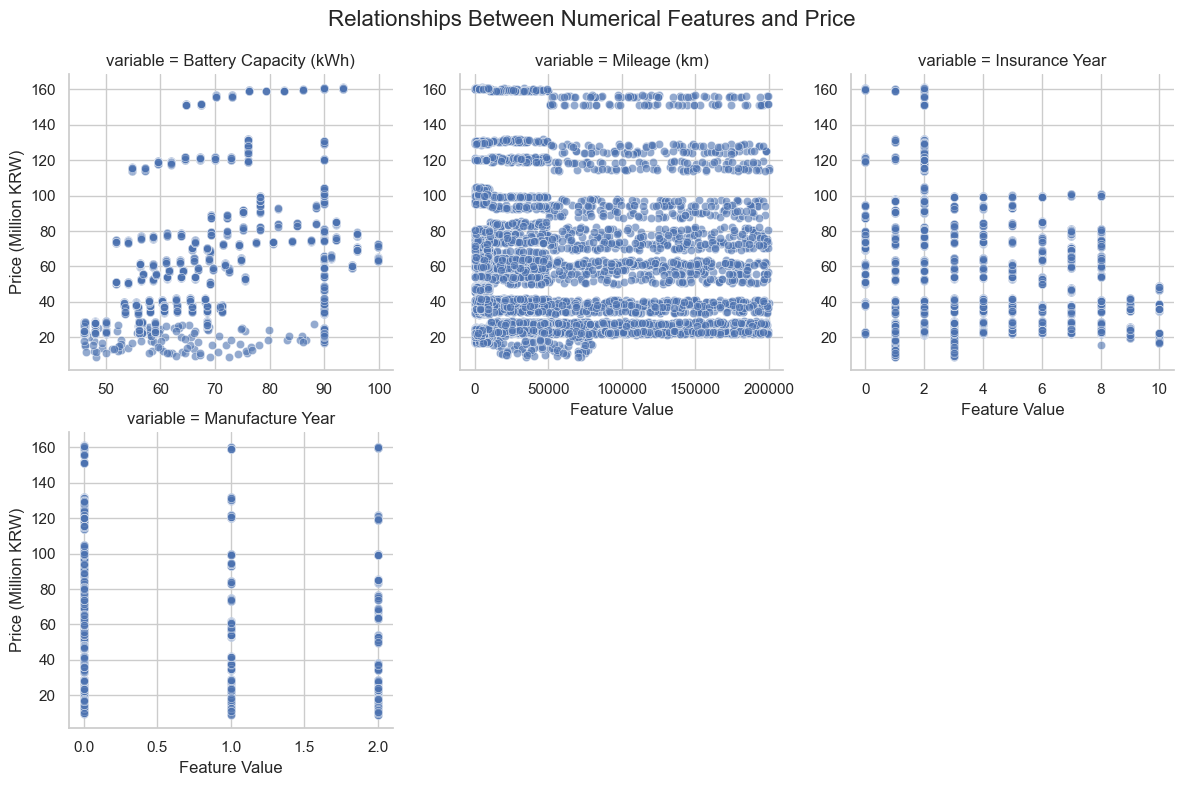

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 변수명을 영어로 매핑
column_mapping = {
    '가격(백만원)': 'Price (Million KRW)',
    '배터리용량': 'Battery Capacity (kWh)',
    '주행거리(km)': 'Mileage (km)',
    '연식(년)': 'Manufacture Year',
    '차량상태': 'Vehicle Condition',
    '사고이력': 'Accident History',
    '보증기간(년)': 'Insurance Year'
    # 필요 시 다른 변수 추가
}

# 열 이름 영어로 변환
train_renamed = train.rename(columns=column_mapping)

# 수치형 변수 선택
numerical_cols = [col for col in train_renamed.select_dtypes(include=['float64', 'int64']).columns if col != 'Price (Million KRW)']

# FacetGrid 생성
g = sns.FacetGrid(pd.melt(train_renamed, id_vars=['Price (Million KRW)'], value_vars=numerical_cols),
                  col='variable', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.scatterplot, 'value', 'Price (Million KRW)', alpha=0.6)

# 제목 및 축 설정
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationships Between Numerical Features and Price", fontsize=16)
g.set_axis_labels("Feature Value", "Price (Million KRW)")

plt.show()

C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2650952481.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_renamed, x=col, palette='Set3')
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2650952481.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_renamed, x=col, palette='Set3')
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2650952481.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_renamed, x=col, palette='Set3')
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2650952481.py:26: FutureWa

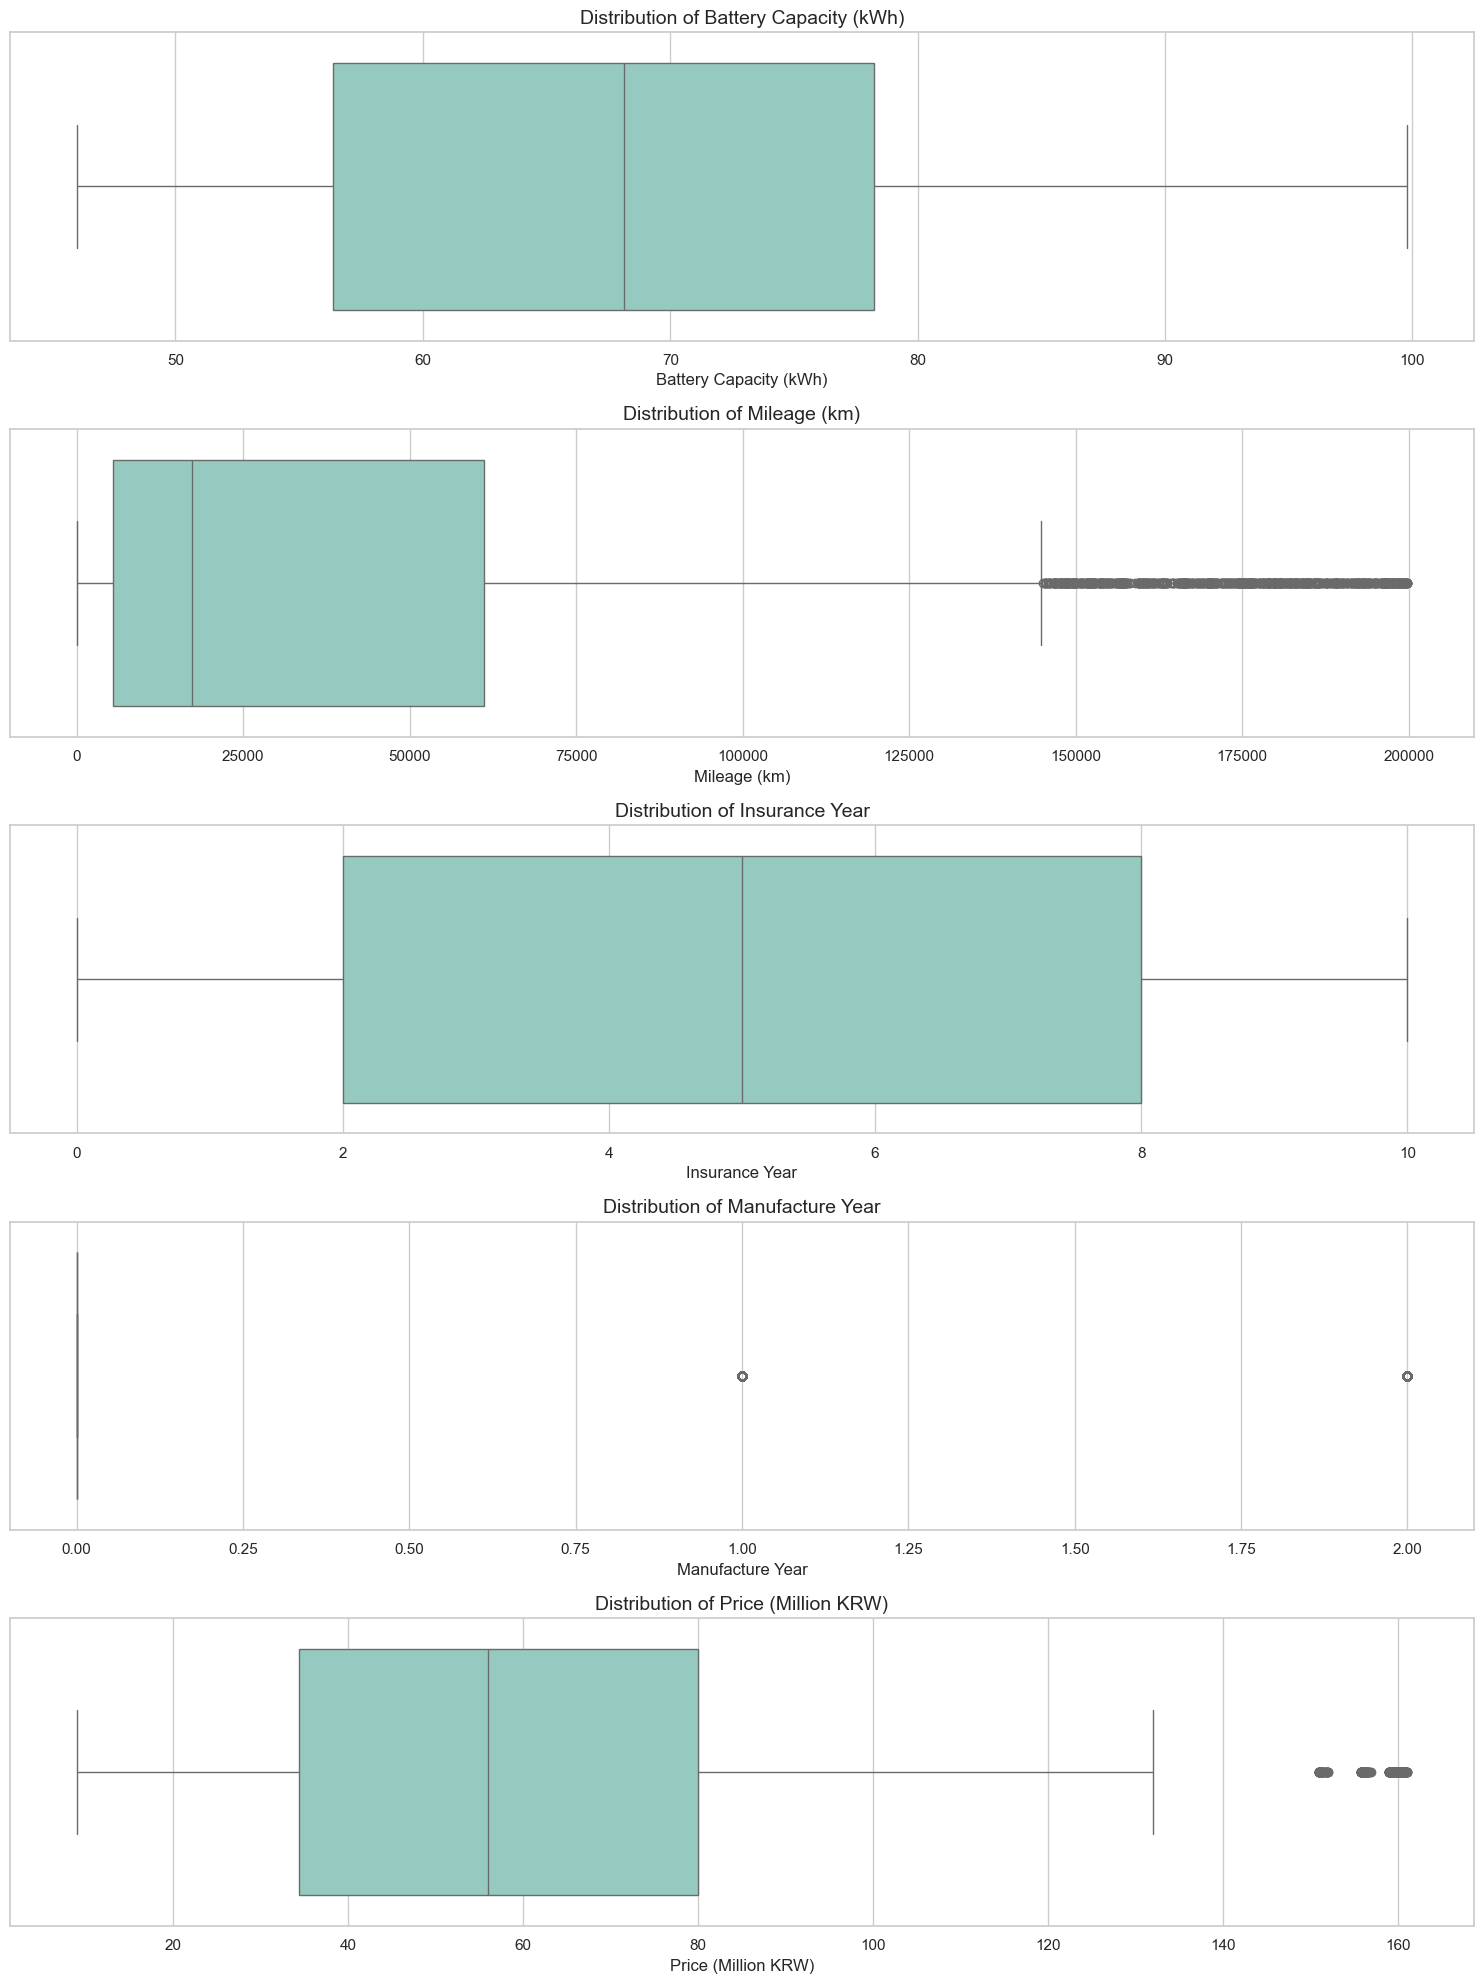

In [462]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 변수명을 영어로 매핑
column_mapping = {
    '가격(백만원)': 'Price (Million KRW)',
    '배터리용량': 'Battery Capacity (kWh)',
    '주행거리(km)': 'Mileage (km)',
    '연식(년)': 'Manufacture Year',
    '차량상태': 'Vehicle Condition',
    '사고이력': 'Accident History',
    '보증기간(년)': 'Insurance Year'
    # 필요 시 다른 변수 추가
}

# 열 이름 영어로 변환
train_renamed = train.rename(columns=column_mapping)

# 수치형 변수 선택
numerical_cols = train_renamed.select_dtypes(include=['float64', 'int64']).columns

# 박스플롯 시각화
plt.figure(figsize=(15, len(numerical_cols) * 4))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(data=train_renamed, x=col, palette='Set3')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


In [ ]:
# IQR 계산
Q1 = train_df['주행거리(km)'].quantile(0.25)
Q3 = train_df['주행거리(km)'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 경계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 대체
train_df['주행거리(km)'] = train_df['주행거리(km)'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)
test_df['주행거리(km)'] = test_df['주행거리(km)'].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)

# 확인
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"After replacement, train_df outliers:")
print(train_df['주행거리(km)'][(train_df['주행거리(km)'] < lower_bound) | (train_df['주행거리(km)'] > upper_bound)])


In [461]:
from sklearn.preprocessing import StandardScaler

# Define continuous variables to scale (excluding the target column)
continuous_vars = ['배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on train data, and transform the test data
train_df[continuous_vars] = scaler.fit_transform(train_df[continuous_vars])
test_df[continuous_vars] = scaler.transform(test_df[continuous_vars])

# Verify the scaled data
train_df[continuous_vars].describe(), test_df[continuous_vars].describe()

(              배터리용량      주행거리(km)       보증기간(년)         연식(년)
 count  7.497000e+03  7.497000e+03  7.497000e+03  7.497000e+03
 mean  -1.743896e-16 -3.032862e-17 -8.719479e-17  5.923559e-17
 std    1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00
 min   -1.871052e+00 -8.022586e-01 -1.572333e+00 -3.908846e-01
 25%   -9.238708e-01 -7.033100e-01 -9.384451e-01 -3.908846e-01
 50%    2.690520e-02 -4.883477e-01  1.238690e-02 -3.908846e-01
 75%    9.040158e-01  3.073171e-01  9.632189e-01 -3.908846e-01
 max    1.522099e+00  2.817716e+00  1.597107e+00  3.122858e+00,
             배터리용량    주행거리(km)     보증기간(년)       연식(년)
 count  846.000000  846.000000  846.000000  846.000000
 mean     0.003472    0.006815    0.021004   -0.027466
 std      0.986806    1.005755    1.000744    0.957140
 min     -1.871052   -0.802277   -1.572333   -0.390885
 25%     -0.885966   -0.690783   -0.938445   -0.390885
 50%     -0.006017   -0.489743    0.012387   -0.390885
 75%      0.904016    0.287195    0.963219   -0

### 3. 변수 선택

In [463]:
train_df.columns

Index(['ID', '배터리용량', '주행거리(km)', '보증기간(년)', '연식(년)', '가격(백만원)', '주행거리_bin',
       '제조사_A사', '제조사_B사', '제조사_H사', '제조사_K사', '제조사_P사', '제조사_T사', '제조사_V사',
       '모델_EV6', '모델_ID4', '모델_ION5', '모델_ION6', '모델_IONIQ', '모델_KNE', '모델_M3',
       '모델_MS', '모델_MX', '모델_MY', '모델_Niro', '모델_Q4eT', '모델_RSeTGT', '모델_Soul',
       '모델_Tay', '모델_TayCT', '모델_TayGTS', '모델_eT', '모델_i3', '모델_i5', '모델_iX',
       '차량상태_encoded', '구동방식_AWD', '구동방식_FWD', '구동방식_RWD', '사고이력_encoded'],
      dtype='object')

In [464]:
train_df.drop(columns=['ID', '주행거리_bin'], inplace=True)
test_df.drop(columns=['ID', '주행거리_bin'], inplace=True)

In [465]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Calculate VIF for remaining features
vif_data = pd.DataFrame()
vif_data['Feature'] = train_df.columns
vif_data['VIF'] = [variance_inflation_factor(numerical_features.values, i) for i in range(numerical_features.shape[1])]

# Display features with high VIF
print(vif_data.sort_values(by='VIF', ascending=False))


        Feature       VIF
0         배터리용량  2.455425
1      주행거리(km)  2.382047
2       보증기간(년)  2.065615
3         연식(년)  1.145604
4  사고이력_encoded  1.000251


### 모델링

optuna + lightgbm / xgboost / catboost -> blend

In [470]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import optuna
import numpy as np

# K-Fold Cross-Validation 설정
kf = KFold(n_splits=10, shuffle=True, random_state=42)

def cross_val_rmse(model_type, params):
    fold_rmse = []
    for train_idx, val_idx in kf.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        if model_type == 'lightgbm':
            train_data = lgb.Dataset(X_train, label=y_train)
            val_data = lgb.Dataset(X_val, label=y_val)
            model = lgb.train(
                params,
                train_data,
                valid_sets=[val_data],
                callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)]
            )
            y_pred = model.predict(X_val, num_iteration=model.best_iteration)
        
        elif model_type == 'xgboost':
            model = xgb.XGBRegressor(**params, n_estimators=1000, verbosity=0)
            model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)
            y_pred = model.predict(X_val)
        
        elif model_type == 'catboost':
            model = cb.CatBoostRegressor(**params, iterations=1000, verbose=0)
            model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50)
            y_pred = model.predict(X_val)

        fold_rmse.append(mean_squared_error(y_val, y_pred, squared=False))
    
    return np.mean(fold_rmse)

# Optuna Objective Function
def objective(trial, model_type):
    if model_type == 'lightgbm':
        params = {
            'objective': 'regression',
            'metric': 'rmse',
            'boosting_type': 'gbdt',
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'min_child_samples': trial.suggest_int('min_child_samples', 5, 50),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
            'verbose': -1,
        }
    
    elif model_type == 'xgboost':
        params = {
            'objective': 'reg:squarederror',
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 15),
            'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
            'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        }
    
    elif model_type == 'catboost':
        params = {
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
            'depth': trial.suggest_int('depth', 3, 15),
        }

    return cross_val_rmse(model_type, params)

# Optimize models with Optuna
results = {}
for model_type in ['lightgbm', 'xgboost', 'catboost']:
    study = optuna.create_study(direction='minimize')
    study.optimize(lambda trial: objective(trial, model_type), n_trials=100)
    results[model_type] = {
        'rmse': study.best_value,
        'params': study.best_params
    }

# Blend top models
top_models = sorted(results.items(), key=lambda x: x[1]['rmse'])[:2]

# Blend predictions
test_predictions = []
for model_name, model_info in top_models:
    if model_name == 'lightgbm':
        model = lgb.LGBMRegressor(**model_info['params'])
    elif model_name == 'xgboost':
        model = xgb.XGBRegressor(**model_info['params'], n_estimators=1000)
    elif model_name == 'catboost':
        model = cb.CatBoostRegressor(**model_info['params'], iterations=1000)
    model.fit(X, y)
    test_predictions.append(model.predict(test_df))

# Average predictions for final output
final_predictions = np.mean(test_predictions, axis=0)

# Create submission file
submission_df['가격(백만원)'] = final_predictions
submission_file = "submission_blended_cv.csv"
submission_df.to_csv(submission_file, index=False)

# Output results
submission_file, top_models


[I 2025-01-07 21:43:04,060] A new study created in memory with name: no-name-448ce4bc-a3eb-4bff-9015-345734bb2590
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2147537837.py:50: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2147537837.py:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\kms10\AppData\Local\Temp\ipykernel_28872\2147537837.py:54: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.

KeyboardInterrupt: 